# Autoregressive model (AR)

In [1]:
import statsmodels

In [2]:
#pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./flights_remainder.csv', index_col=0, parse_dates=True)

In [4]:
df.head()

,remainder
date,
1949-01-01,4.405303
1949-02-01,17.496212
1949-03-01,7.496212
1949-04-01,9.587121
1949-05-01,-5.231061


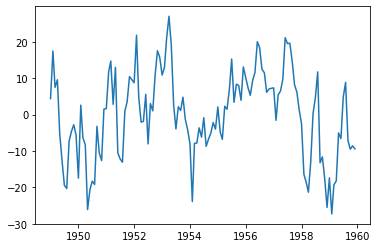

In [5]:
plt.plot(df['remainder'])

### Stationarity
The main characteristics of the data is not time dependent    
* Mean       
* Variance     

White noise: random, stationary    

In [7]:
data = range(10)

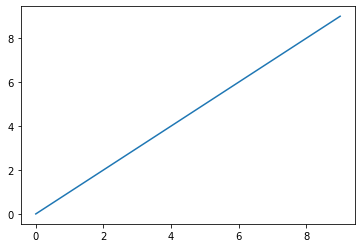

In [8]:
plt.plot(data)

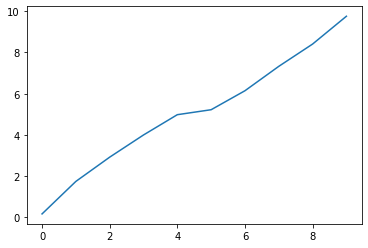

In [10]:
plt.plot(data + np.random.random(10))  # add a random number between 0 and 1 [0,1)
# Problem, we only add a number

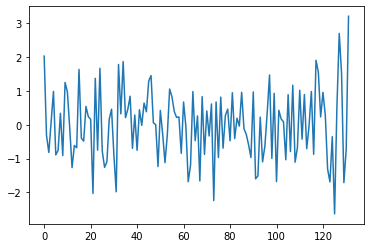

In [15]:
plt.plot(np.random.normal(0, 1, 132))

## Autocorrelation

$MSE = \frac{1}{n} \sum_i^n (\hat{y} - y_i)^2$      
$Var(y) = \frac{1}{n} \sum_i^n (\bar{y} - y_i)^2 = \frac{1}{n} \sum_i^n (\bar{y} - y_i) \cdot (\bar{y} - y_i)$ Population variance
$Covariance(y,x) = \frac{1}{n} \sum_i^n (\bar{y} - y_i) \cdot (\bar{x} - x_i)$     
$Correlation(y,x) = \frac{Cov(y,x)}{\sigma(y)\cdot\sigma(x)}$  Pearson correlation ($\sigma = std$)


In [ ]:
$MSE = \frac{1}{n} \sum_i^n (\hat{y} - y_i)^2$      
$Var(y) = \frac{1}{n} \sum_i^n (\bar{y} - y_i)^2 = \frac{1}{n} \sum_i^n (\bar{y} - y_i) \cdot (\bar{y} - y_i)$ Population variance
$Covariance(y,x) = \frac{1}{n} \sum_i^n (\bar{y} - y_i) \cdot (\bar{x} - x_i)$     
$Correlation(y,x) = \frac{Cov(y,x)}{\sigma(y)\cdot\sigma(x)}$

In [16]:
df['lag1'] = df['remainder'].shift(1)

In [25]:
df['lag2'] = df['remainder'].shift(2)

In [26]:
df

,remainder,lag1,lag2
date,,,
1949-01-01,4.405303,NaN,NaN
1949-02-01,17.496212,4.405303,NaN
1949-03-01,7.496212,17.496212,4.405303
1949-04-01,9.587121,7.496212,17.496212
1949-05-01,-5.231061,9.587121,7.496212
...,...,...,...
1959-08-01,8.867424,4.776515,-6.587121
1959-09-01,-7.132576,8.867424,4.776515
1959-10-01,-9.496212,-7.132576,8.867424


In [34]:
0.758226 * 0.757158

0.574096881708

In [27]:
df.corr()

,remainder,lag1,lag2
remainder,1.000000,0.758226,0.602811
lag1,0.758226,1.000000,0.757158
lag2,0.602811,0.757158,1.000000


AR(1) is the a linear regression with the lag1 as X and the **remainder** as y    
AR has the hyperparameter **p** - order (number of lags)

AR(1) $y_{t+1} = w_0 + w_1\cdot y_{t} + \epsilon$    
AR(p) $y_{t+1} = w_0 + \sum_{j=0}^{p-1} w_{j+1} \cdot y_{t-j} + \epsilon$

In [23]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.ar_model import ar_select_order, AutoReg

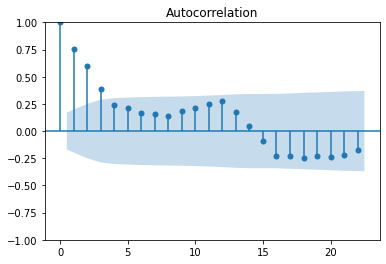

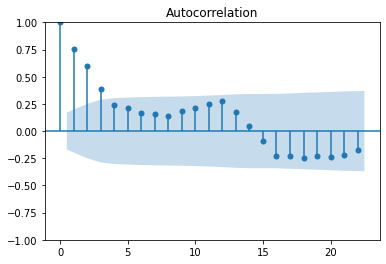

In [28]:
plot_acf(df['remainder']) # autorcorrelation function

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


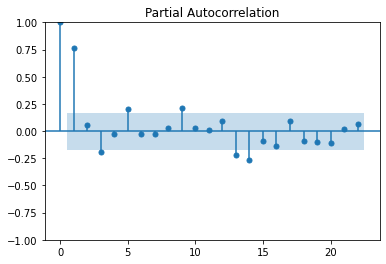

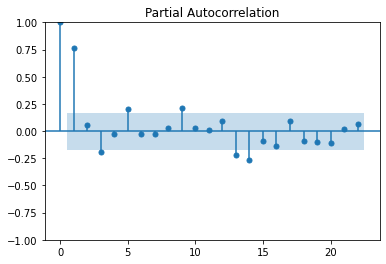

In [29]:
plot_pacf(df['remainder'])  # partial autocorrelation function

In [32]:
ar_order = ar_select_order(df['remainder'], maxlag=25)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [33]:
ar_order.ar_lags

[1]